In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_continuous
%store -r Y_relative_footsteps_continuous
print(X_relative_footsteps_continuous.shape)
print(Y_relative_footsteps_continuous.shape)

(21421, 28)
(21421, 8)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where FR is swinging
idxs = np.where(X_relative_footsteps_continuous[:, 22] == 1)[0]
X_relative_footsteps_continuous_FR_swinging = X_relative_footsteps_continuous[idxs]
Y_relative_footsteps_continuous_FR_swinging = Y_relative_footsteps_continuous[idxs]

## Predict FR foot -> x

In [8]:
X_relative_footsteps_continuous_FR_swinging[0, :]

array([ 1.00000000e-01,  0.00000000e+00,  0.00000000e+00,  2.84895771e-02,
       -2.91453020e-02,  2.23710749e-02, -8.38189804e-04,  2.31294258e-02,
        9.54991797e-03,  2.23055032e-01,  1.73126695e-01, -4.09548272e-01,
        2.39919112e-01, -1.66095484e-01, -4.09774008e-01, -2.37248781e-01,
        1.66372462e-01, -4.12611949e-01, -2.53876758e-01, -1.60041555e-01,
       -4.13015290e-01,  0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  1.00000000e-01,  0.00000000e+00,  0.00000000e+00])

In [9]:
Y_relative_footsteps_continuous_FR_swinging[0, :]

array([ 0.23698767,  0.17026876,  0.23344301, -0.16811552, -0.24342878,
        0.16518854, -0.24083982, -0.16411242])

### Linear Regression

In [64]:
# Input
X = np.hstack((X_relative_footsteps_continuous_FR_swinging[:, :3], # motion command
               X_relative_footsteps_continuous_FR_swinging[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_FR_swinging[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_FR_swinging[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_FR_swinging[:, 18:20])) # RR (x,y) position 

# Target
Y = np.array([Y_relative_footsteps_continuous_FR_swinging[:, 2]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fr_relative_swinging_x = LinearRegression()

# Fit the model
model_fr_relative_swinging_x.fit(X_train, Y_train)

# Predict
predictions = model_fr_relative_swinging_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9961689321923022
RMSE:  0.0018047981079370448
The lowest error is:  1.5061970043972472e-06
The highest error is:  0.01851125568993045
The avg. error is:  0.0012384853881864662


In [65]:
model_fr_relative_swinging_x.coef_

array([[-0.17380282, -0.02054916, -0.0643635 , -0.10949882,  0.05845909,
         0.99683475,  0.0845313 ,  0.06441501,  0.09428347, -0.27935072,
        -0.20687726]])

In [66]:
model_fr_relative_swinging_x.intercept_

array([-0.06473298])

Text(0, 0.5, 'Predictions')

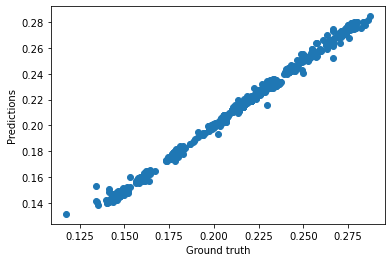

In [67]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [13]:
#%store model_fr_relative_swinging_x

In [14]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [15]:
# Save model
#joblib.dump(model_fr_relative_swinging_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fr_relative_swinging_x.sav")

### Predict FR foot -> y

In [85]:
# Input
X = np.hstack((X_relative_footsteps_continuous_FR_swinging[:, :3], # motion command
               X_relative_footsteps_continuous_FR_swinging[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_FR_swinging[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_FR_swinging[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_FR_swinging[:, 18:20])) # RR (x,y) position 

# Target
Y = np.array([Y_relative_footsteps_continuous_FR_swinging[:, 3]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fr_relative_swinging_y = LinearRegression()

# Fit the model
model_fr_relative_swinging_y.fit(X_train, Y_train)

# Predict
predictions = model_fr_relative_swinging_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9983454128977972
RMSE:  0.001699910079025687
The lowest error is:  6.804423251793867e-07
The highest error is:  0.019660676333922933
The avg. error is:  0.0011010618556475595


In [86]:
model_fr_relative_swinging_y.coef_

array([[-0.05294284, -0.14021495, -0.1968252 , -0.08955578, -0.29841152,
         0.1314537 ,  0.92010731,  0.37725133, -0.35068304,  0.00566134,
        -0.2940644 ]])

In [87]:
model_fr_relative_swinging_y.intercept_

array([0.13259666])

Text(0, 0.5, 'Predictions')

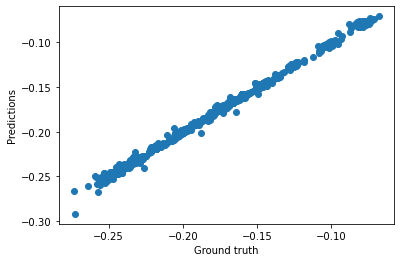

In [88]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [19]:
#%store model_fr_relative_swinging_y

In [20]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [21]:
# Save model
#joblib.dump(model_fr_relative_swinging_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fr_relative_swinging_y.sav")